# DSE220 - Homework 3

# Answers Section
##### See below for corresponding code
__*Question 1:*__  Perform a 80-20 split using train test split on the data to obtain the train and the test data (random state=3). Use Logistic Regression to classify the wines according to their cultivators. Tune parameters ’penalty’ and ’C’ using GridSearchCV implementation. Report the accuracy on test data.
<pre>
test data accuracy = 0.888888888889

best parameters:
 {'C': 1, 'penalty': 'l1'}

other parameter combinations with same accuracy:
4     {'C': 1, 'penalty': 'l1'}
6     {'C': 2, 'penalty': 'l1'}
7     {'C': 2, 'penalty': 'l2'}
8     {'C': 3, 'penalty': 'l1'}
10    {'C': 4, 'penalty': 'l1'}
13    {'C': 5, 'penalty': 'l2'}
Name: params, dtype: object
</pre>

__*Question 2:*__ After obtaining the tf-idf vectors for train and test data, use the perceptron model (no penalty) to train on the training vectors and compute the accuracy on the test vectors.
<pre>
Test accuracy = 0.769282814614
</pre>

__*Question 3:*__ Keeping all the above data processing steps same observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a perceptron model. Report and plot the results.
<pre>
Perceptron accuracy results:
accuracy for 100 features = 0.604194857916
accuracy for 200 features = 0.665087956698
accuracy for 500 features = 0.723951285521
accuracy for 1000 features = 0.72801082544
accuracy for 1500 features = 0.751691474966
accuracy for 2000 features = 0.769282814614
accuracy for 3000 features = 0.768606224628

(See code below for plot of accuracy results.)
</pre>

__*Question 4:*__ After obtaining the tf-idf vectors for train and test data, use the SVM model to train on the training vectors and compute the accuracy on the test vectors. Use linear kernel and default parameters.
<pre>
Test accuracy = 0.78552097429
</pre>

__*Question 5:*__ Keeping all the above data processing steps same observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a linear SVM model. Report and plot the results.
<pre>
SVM (linear kernel) accuracy results:
accuracy for 100 features = 0.652232746955
accuracy for 200 features = 0.692151556157
accuracy for 500 features = 0.742219215156
accuracy for 1000 features = 0.766576454668
accuracy for 1500 features = 0.776725304465
accuracy for 2000 features = 0.78552097429
accuracy for 3000 features = 0.808525033829

(See code below for plot of accuracy results.)
</pre>

__*Question 6:*__ Perform 80-20 split of the training data to obtain validation data using train test split (random state=10). Use this validation data to tune the cost parameter ’C’ for values 0.01,0.1,1,10,100. Select the best value compute the accuracy for the test data. Report the validation and test accuracies.
<pre>
best C is 1
validation accuracy for best C is 0.820224719101
test data accuracy = 0.792286874154
</pre>

__*Question 7:*__ Train a kernelized SVM (with ’C’=10000) with kernel values - ’poly’ with degree 1, 2, 3, ’rbf’ and ’sigmoid’, and report the one with best accuracy on validation data. Also report the test accuracy for the selected kernel.
<pre>
best validation accuracy is 0.784269662921 for rbf kernel
test data accuracy = 0.769959404601
</pre>

__*Question 8:*__ Use Cosine Similarity and Laplacian Kernel $(e^{-\lvert\lvert x−y \lvert\lvert_1})$ measures, and report the test accuracies using these kernels with SVM.
<pre>
accuracy of SVM with cosine similarity kernel on test data = 0.78552097429
accuracy of SVM with laplacian kernel on test data = 0.266576454668
</pre>

__*Question 9:*__ Another way to construct a kernel is use a linear combination of 2 kernels. Let K be a kernel represented as:

$
\ \ \ \ \ \ \ \ K(x, y) = \alpha K_1(x, y) + (1 − \alpha) K_2(x, y),\ (0 \leq \alpha \leq 1)
$

Why is K a valid kernel? Does your reasoning hold true for other values of α as well? Let K1 be the ’cosine similarity’ and K2 be ’Laplacian Kernel’. Using K as kernel, train a SVM model to tune the value of α (upto one decimal) and report the accuracy on the test data using the selected parameter.

If $K_1$ and $K_2$ are valid kernels, then the associated matrices are positive semi-definite.  If the matrices associated with $K_1$ and $K_2$ are $A_1$ and $A_2$, respectively, then the matrix associated with $K$ is $\alpha A_1 + (1-\alpha) A_2$, which is also positive semi-definite, so K is also a valid kernel.  This may not necessarily be the case if $\alpha$ does not satisfy $0 \leq \alpha \leq 1$.
<pre>
accuracy of SVM with custom kernel with alpha = 0.0 on test data = 0.266576454668
accuracy of SVM with custom kernel with alpha = 0.1 on test data = 0.759810554804
accuracy of SVM with custom kernel with alpha = 0.2 on test data = 0.786197564276
accuracy of SVM with custom kernel with alpha = 0.3 on test data = 0.792286874154
accuracy of SVM with custom kernel with alpha = 0.4 on test data = 0.792286874154
accuracy of SVM with custom kernel with alpha = 0.5 on test data = 0.799729364005
accuracy of SVM with custom kernel with alpha = 0.6 on test data = 0.797699594046
accuracy of SVM with custom kernel with alpha = 0.7 on test data = 0.793640054127
accuracy of SVM with custom kernel with alpha = 0.8 on test data = 0.792286874154
accuracy of SVM with custom kernel with alpha = 0.9 on test data = 0.787550744249
accuracy of SVM with custom kernel with alpha = 1.0 on test data = 0.78552097429
</pre>

# Code Section

__*Question 1:*__  Perform a 80-20 split using train test split on the data to obtain the train and the test data (random state=3). Use Logistic Regression to classify the wines according to their cultivators. Tune parameters ’penalty’ and ’C’ using GridSearchCV implementation. Report the accuracy on test data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
# obtain data and split into training and test sets
data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class']
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=3)

# check shapes
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (142, 13)
y_train shape: (142,)
X_test shape: (36, 13)
y_test shape: (36,)


In [3]:
# set parameters for gridsearch cross validation
parameters = {'penalty': ['l1','l2'], 
              'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10]}

# create classifier
logreg = LogisticRegression()
clf_logreg = GridSearchCV(logreg, parameters, n_jobs=-1)

# fit combined training data
clf_logreg.fit(X_train, y_train)

# predict test data
y_pred = clf_logreg.predict(X_test)

# check accuracy on test data
print('test data accuracy =', accuracy_score(y_pred, y_test))

# print best parameters
print('\nbest parameters:\n', clf_logreg.best_params_)

# print all parameter combinations with same accuracy
results = pd.DataFrame(clf_logreg.cv_results_)
print('\nother parameter combinations with same accuracy:\n',results.loc[results['rank_test_score']==1,'params'])

test data accuracy = 0.888888888889

best parameters:
 {'C': 1, 'penalty': 'l1'}

other parameter combinations with same accuracy:
 4     {'C': 1, 'penalty': 'l1'}
6     {'C': 2, 'penalty': 'l1'}
7     {'C': 2, 'penalty': 'l2'}
8     {'C': 3, 'penalty': 'l1'}
10    {'C': 4, 'penalty': 'l1'}
13    {'C': 5, 'penalty': 'l2'}
Name: params, dtype: object


## Perceptron and Support Vector Machines
### Data:

In this section, we will work on the text data. Download the newsgroups data (train and test) using fetch 20newsgroups for categories: ’alt.atheism’, ’comp.graphics’, ’sci.space’ and ’talk.politics.mideast’ after removing ’headers’, ’footers’ and ’quotes’ from the data. Convert all the words in the text to lower case. A common practice is to remove the stopwords like a, and, the etc. from the text. Use nltk to get the stopwords list (nltk.corpus.stopwords) and remove the stopwords from the text. Use TfidfVectorizer to obtain the tfidf vectors (after smoothing) for the train and test data and select only top 2000 features (words). You can also perform the above stated actions (lowercase and stop- words) using the TfidfVectorizer. Note: You’ll fit the tf-idf vectors on the train data and use the same to transform the test data.

Note: Smoothing the text data is same as computing the idf values after adding a document with all words in the vocabulary.

In [4]:
from sklearn.datasets import fetch_20newsgroups

# download data
cats = ['alt.atheism','comp.graphics','sci.space','talk.politics.mideast']

train = fetch_20newsgroups(subset='train',
                          categories=cats,
                          random_state=5,
                          remove=('headers','footers','quotes'))

test = fetch_20newsgroups(subset='test',
                          categories=cats,
                          random_state=5,
                          remove=('headers','footers','quotes'))

print(len(train.data))
print(len(test.data))

2221
1478


In [5]:
# using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# set list of stopwords to remove
stop = set(stopwords.words('english'))

# create vectorizer
vectorizer = TfidfVectorizer(stop_words=stop,#'english', 
                             lowercase=True,
                             max_features=2000,
                             smooth_idf=True)

# fit vectorizer and transform train data
X_train = vectorizer.fit_transform(train.data)

# transform test data
X_test = vectorizer.transform(test.data)

# extract labels as y values
y_train = train.target
y_test = test.target

# check shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2221, 2000)
(2221,)
(1478, 2000)
(1478,)


__*Question 2:*__ After obtaining the tf-idf vectors for train and test data, use the perceptron model (no penalty) to train on the training vectors and compute the accuracy on the test vectors.

In [6]:
from sklearn.linear_model import Perceptron

# Model
clf_perc = Perceptron()

# fit
clf_perc.fit(X_train, y_train)

# predict
pred = clf_perc.predict(X_test)

#evaluate
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))
print ('Test f1 score = ' + str(f1_score(y_test, pred, average='macro')))

Test accuracy = 0.769282814614
Test f1 score = 0.766451872222


__*Question 3:*__ Keeping all the above data processing steps same observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a perceptron model. Report and plot the results.

In [7]:
num_features_list = [100,200,500,1000,1500,2000,3000]
accuracy_results = []

print('Perceptron accuracy results:')
for num_features in num_features_list:
    # create vectorizer
    vectorizer = TfidfVectorizer(stop_words=stop,#'english', 
                                 lowercase=True,
                                 max_features=num_features,
                                 smooth_idf=True)

    # fit vectorizer and transform train data
    X_train = vectorizer.fit_transform(train.data)

    # transform test data
    X_test = vectorizer.transform(test.data)

    # Model
    clf_perc = Perceptron()

    # fit
    clf_perc.fit(X_train, y_train)

    # predict
    pred = clf_perc.predict(X_test)

    # append accuracy score
    acc = accuracy_score(y_test, pred)
    accuracy_results.append(acc)
    
    print('accuracy for',str(num_features),'features =',str(acc))

Perceptron accuracy results:
accuracy for 100 features = 0.604194857916
accuracy for 200 features = 0.665087956698
accuracy for 500 features = 0.723951285521
accuracy for 1000 features = 0.72801082544
accuracy for 1500 features = 0.751691474966
accuracy for 2000 features = 0.769282814614
accuracy for 3000 features = 0.768606224628


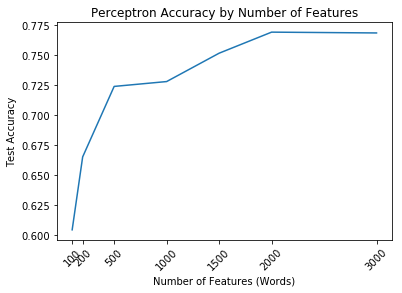

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(num_features_list,accuracy_results)
plt.title('Perceptron Accuracy by Number of Features')
plt.xlabel('Number of Features (Words)')
plt.ylabel('Test Accuracy')
plt.xticks(num_features_list, rotation=45)
plt.show();

__*Question 4:*__ After obtaining the tf-idf vectors for train and test data, use the SVM model to train on the training vectors and compute the accuracy on the test vectors. Use linear kernel and default parameters.

In [9]:
# remake train and test data with 2000 features

# create vectorizer
vectorizer = TfidfVectorizer(stop_words=stop,#'english', 
                             lowercase=True,
                             max_features=2000,
                             smooth_idf=True)

# fit vectorizer and transform train data
X_train = vectorizer.fit_transform(train.data)

# transform test data
X_test = vectorizer.transform(test.data)

# extract labels as y values
y_train = train.target
y_test = test.target

# check shapes
print('check shapes:')
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

check shapes:
X_train shape: (2221, 2000)
y_train shape: (2221,)
X_test shape: (1478, 2000)
y_test shape: (1478,)


In [10]:
from sklearn.svm import SVC

# model
clf_svm = SVC(kernel='linear')

# fit
clf_svm.fit(X_train, y_train)

# predict
pred = clf_svm.predict(X_test)

# evaluate accuracy
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.78552097429


__*Question 5:*__ Keeping all the above data processing steps same observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a linear SVM model. Report and plot the results.

In [11]:
num_features_list = [100,200,500,1000,1500,2000,3000]
accuracy_results = []

print('SVM (linear kernel) accuracy results:')
for num_features in num_features_list:
    # create vectorizer
    vectorizer = TfidfVectorizer(stop_words=stop,#'english', 
                                 lowercase=True,
                                 max_features=num_features,
                                 smooth_idf=True)

    # fit vectorizer and transform train data
    X_train = vectorizer.fit_transform(train.data)

    # transform test data
    X_test = vectorizer.transform(test.data)

    # Model
    clf_svm = SVC(kernel='linear')

    # fit
    clf_svm.fit(X_train, y_train)

    # predict
    pred = clf_svm.predict(X_test)

    # append accuracy score
    acc = accuracy_score(y_test, pred)
    accuracy_results.append(acc)
    
    print('accuracy for',str(num_features),'features =',str(acc))

SVM (linear kernel) accuracy results:
accuracy for 100 features = 0.652232746955
accuracy for 200 features = 0.692151556157
accuracy for 500 features = 0.742219215156
accuracy for 1000 features = 0.766576454668
accuracy for 1500 features = 0.776725304465
accuracy for 2000 features = 0.78552097429
accuracy for 3000 features = 0.808525033829


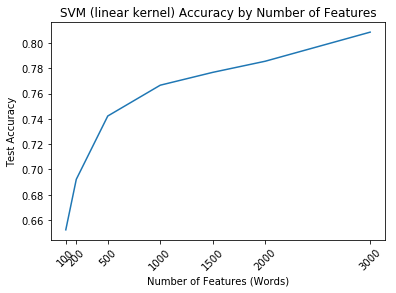

In [12]:
# plot results
plt.plot(num_features_list,accuracy_results)
plt.title('SVM (linear kernel) Accuracy by Number of Features')
plt.xlabel('Number of Features (Words)')
plt.ylabel('Test Accuracy')
plt.xticks(num_features_list, rotation=45)
plt.show();

__*Question 6:*__ Perform 80-20 split of the training data to obtain validation data using train test split (random state=10). Use this validation data to tune the cost parameter ’C’ for values 0.01,0.1,1,10,100. Select the best value compute the accuracy for the test data. Report the validation and test accuracies. Note: Use full data of 2000 vectors here.

In [13]:
# split train data into train and validation data sets
X_train, X_val, y_train, y_val = train_test_split(train.data, train.target, train_size=0.8, random_state=10)

# revectorize data with 2000 features

# create vectorizer
vectorizer = TfidfVectorizer(stop_words=stop,#'english', 
                             lowercase=True,
                             max_features=2000,
                             smooth_idf=True)

# fit vectorizer and transform train data
X_train = vectorizer.fit_transform(X_train)

# transform validation data
X_val = vectorizer.transform(X_val)

# transform test data
X_test = vectorizer.transform(test.data)

# extract labels as y values
y_test = test.target

# check shapes
print('check shapes:')
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_val shape:',X_val.shape)
print('y_val shape:',y_val.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

check shapes:
X_train shape: (1776, 2000)
y_train shape: (1776,)
X_val shape: (445, 2000)
y_val shape: (445,)
X_test shape: (1478, 2000)
y_test shape: (1478,)


In [14]:
# determine best C value using validation data
accuracies = []
best_acc = 0.0
best_c = None

for cost in [0.01,0.1,1,10,100]:
    clf_svm = SVC(kernel='linear',C=cost)
    clf_svm.fit(X_train, y_train)
    y_pred = clf_svm.predict(X_val)
    acc = accuracy_score(y_pred, y_val)
    
    print('val accuracy for C =',str(cost),'is', str(acc))
    accuracies.append(acc)
    
    if acc > best_acc:
        best_c = cost
        best_acc = acc

print('\nbest C is',str(best_c))
print('validation accuracy for best C is',str(best_acc))

val accuracy for C = 0.01 is 0.260674157303
val accuracy for C = 0.1 is 0.739325842697
val accuracy for C = 1 is 0.820224719101
val accuracy for C = 10 is 0.784269662921
val accuracy for C = 100 is 0.748314606742

best C is 1
validation accuracy for best C is 0.820224719101


In [15]:
from scipy import sparse

# fit combined train + validation data using best C value
clf_svm = SVC(kernel='linear',C=best_c)
X_train = sparse.vstack((X_train, X_val))
y_train = np.concatenate((y_train, y_val))
clf_svm.fit(X_train, y_train)

# predict test data
y_pred = clf_svm.predict(X_test)

# check accuracy on test data
print('test data accuracy =', accuracy_score(y_pred, y_test))

test data accuracy = 0.792286874154


__*Question 7:*__ Train a kernelized SVM (with ’C’=10000) with kernel values - ’poly’ with degree 1, 2, 3, ’rbf’ and ’sigmoid’, and report the one with best accuracy on validation data. Also report the test accuracy for the selected kernel.

In [16]:
# split train data into train and validation data sets
X_train, X_val, y_train, y_val = train_test_split(train.data, train.target, train_size=0.8, random_state=10)

# revectorize data with 2000 features

# create vectorizer
vectorizer = TfidfVectorizer(stop_words=stop,#'english', 
                             lowercase=True,
                             max_features=2000,
                             smooth_idf=True)

# fit vectorizer and transform train data
X_train = vectorizer.fit_transform(X_train)

# transform validation data
X_val = vectorizer.transform(X_val)

# transform test data
X_test = vectorizer.transform(test.data)

# extract labels as y values
y_test = test.target

In [17]:
# loop through parameters and identify best accuracy on validation data
cost = 10000
degrees = [1,2,3]
kernels = ['poly','rbf','sigmoid']
best_acc = 0.0
best_params = None

for k in kernels:
    if k == 'poly':
        for d in degrees:
            clf_svm = SVC(kernel=k, degree=d, C=cost)
            clf_svm.fit(X_train, y_train)
            y_pred = clf_svm.predict(X_val)
            acc = accuracy_score(y_pred, y_val)
            print('val accuracy for poly degree',d,'=',str(acc))
            
            if acc > best_acc:
                best_acc = acc
                best_params = str(k) + ' ' + str(d)
    else:
        clf_svm = SVC(kernel=k, C=cost)
        clf_svm.fit(X_train, y_train)
        y_pred = clf_svm.predict(X_val)
        acc = accuracy_score(y_pred, y_val)
        print('val accuracy for',k,'=',str(acc))
        
        if acc > best_acc:
            best_acc = acc
            best_params = str(k)
            
print('\nbest validation accuracy is',str(best_acc),'for',best_params,'kernel')

val accuracy for poly degree 1 = 0.78202247191
val accuracy for poly degree 2 = 0.260674157303
val accuracy for poly degree 3 = 0.260674157303
val accuracy for rbf = 0.784269662921
val accuracy for sigmoid = 0.78202247191

best validation accuracy is 0.784269662921 for rbf kernel


In [18]:
# fit combined train + validation data using best parameters
clf_svm = SVC(kernel='rbf',C=cost)
X_train = sparse.vstack((X_train, X_val))
y_train = np.concatenate((y_train, y_val))
clf_svm.fit(X_train, y_train)

# predict test data
y_pred = clf_svm.predict(X_test)

# check accuracy on test data
print('test data accuracy =', accuracy_score(y_pred, y_test))

test data accuracy = 0.769959404601


__*Question 8:*__ Use Cosine Similarity and Laplacian Kernel $(e^{-\lvert\lvert x−y \lvert\lvert_1})$ measures, and report the test accuracies using these kernels with SVM.

In [19]:
# remake train and test data with 2000 features

# create vectorizer
vectorizer = TfidfVectorizer(stop_words=stop,#'english', 
                             lowercase=True,
                             max_features=2000,
                             smooth_idf=True)

# fit vectorizer and transform train data
X_train = vectorizer.fit_transform(train.data)

# transform test data
X_test = vectorizer.transform(test.data)

# extract labels as y values
y_train = train.target
y_test = test.target

# check shapes
print('check shapes:')
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

check shapes:
X_train shape: (2221, 2000)
y_train shape: (2221,)
X_test shape: (1478, 2000)
y_test shape: (1478,)


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import laplacian_kernel

# cosine similarity
clf_svm = SVC(kernel=cosine_similarity)
clf_svm.fit(X_train, y_train)
pred = clf_svm.predict(X_test)
print('accuracy of SVM with cosine similarity kernel on test data =',str(accuracy_score(y_test,pred)))

# laplacian kernel
clf_svm = SVC(kernel=laplacian_kernel)
clf_svm.fit(X_train, y_train)
pred = clf_svm.predict(X_test)
print('accuracy of SVM with laplacian kernel on test data =',str(accuracy_score(y_test,pred)))

accuracy of SVM with cosine similarity kernel on test data = 0.78552097429
accuracy of SVM with laplacian kernel on test data = 0.266576454668


__*Question 9:*__ Another way to construct a kernel is use a linear combination of 2 kernels. Let K be a kernel represented as:

$
\ \ \ \ \ K(x, y) = \alpha K_1(x, y) + (1 − \alpha) K_2(x, y),\ (0 \leq \alpha \leq 1)
$

Why is K a valid kernel? Does your reasoning hold true for other values of α as well? Let K1 be the ’cosine similarity’ and K2 be ’Laplacian Kernel’. Using K as kernel, train a SVM model to tune the value of α (upto one decimal) and report the accuracy on the test data using the selected parameter.

If $K_1$ and $K_2$ are valid kernels, then the associated matrices are positive semi-definite.  If the matrices associated with $K_1$ and $K_2$ are $A_1$ and $A_2$, respectively, then the matrix associated with K is $\alpha A_1 + (1-\alpha) A_2$, which is also positive semi-definite, so K is also a valid kernel.  This may not necessarily be the case if $\alpha$ does not satisfy $0 \leq \alpha \leq 1$.

In [21]:
# create custom kernel
def create_kernel(alpha = 0.5):
    '''Function to create custom kernels that are a linear combination of 
    cosine_similarity and laplacian_kernel'''
    return lambda x,y: alpha*cosine_similarity(x,y) + (1-alpha)*laplacian_kernel(x,y)
    
# loop through alpha values and evaluate SVM results
for alph in [x/10.0 for x in range(0,11)]:
    # create hybrid kernel with specific alpha value
    hybrid_kernel = create_kernel(alpha = alph)

    # model
    clf_svm = SVC(kernel=hybrid_kernel)
    
    # fit
    clf_svm.fit(X_train, y_train)
    
    # predict
    pred = clf_svm.predict(X_test)
    
    # evaluate
    acc = accuracy_score(y_test, pred)
    print('accuracy of SVM with custom kernel with alpha =',str(alph),'on test data =',str(acc))

accuracy of SVM with custom kernel with alpha = 0.0 on test data = 0.266576454668
accuracy of SVM with custom kernel with alpha = 0.1 on test data = 0.759810554804
accuracy of SVM with custom kernel with alpha = 0.2 on test data = 0.786197564276
accuracy of SVM with custom kernel with alpha = 0.3 on test data = 0.792286874154
accuracy of SVM with custom kernel with alpha = 0.4 on test data = 0.792286874154
accuracy of SVM with custom kernel with alpha = 0.5 on test data = 0.799729364005
accuracy of SVM with custom kernel with alpha = 0.6 on test data = 0.797699594046
accuracy of SVM with custom kernel with alpha = 0.7 on test data = 0.793640054127
accuracy of SVM with custom kernel with alpha = 0.8 on test data = 0.792286874154
accuracy of SVM with custom kernel with alpha = 0.9 on test data = 0.787550744249
accuracy of SVM with custom kernel with alpha = 1.0 on test data = 0.78552097429
